<a href="https://colab.research.google.com/github/tayfununal/Artificial-Neural-Network-with-One-Hidden-Layer/blob/main/new_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
!pip install playground-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plygdata as pg
import json
import requests

In [121]:
pg.dataset.random.seed(8)
Datas = pg.dataset.DataGenerator.classify_circle(1000,noise=0.1)

In [122]:
def initialization_parameters(x, y, num_node, random_seeds_one, random_seeds_two):
    np.random.seed(random_seeds_one)
    W1 = np.random.randn(num_node * x.shape[0]).reshape(num_node, x.shape[0])
    b1 = np.zeros((num_node, 1))

    np.random.seed(random_seeds_two)
    W2 = np.random.randn(y.shape[0], num_node)
    b2 = np.zeros((y.shape[0], 1))

    assert W1.shape == (num_node, x.shape[0])
    assert b1.shape == (num_node, 1)

    assert W2.shape == (y.shape[0], num_node)
    assert b2.shape == (y.shape[0], 1)

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def reluDerivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x


def forward_prop(x, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, x) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert (A2.shape == (1, x.shape[1]))
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache


def backward_prop(x, y, parameters, baski_neuron, cache, learning_rate=0.1):
    m = y.shape[1]

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    A1 = cache['A1']
    A2 = cache['A2']

    # Calculations of backward propagation: dW1, db1, dW2, db2
    baski_W1 = np.zeros((baski_neuron, 2))
    baski_W1[baski_neuron - 1, 0] = gama * W1[baski_neuron - 1, 0]
    baski_W1[baski_neuron - 1, 1] = gama * W1[baski_neuron - 1, 1]

    baski_W2 = np.zeros((1, baski_neuron))
    baski_W2[0, baski_neuron - 1] = gama * W2[0, baski_neuron - 1]

    baski_b1 = np.zeros((baski_neuron, 1))
    baski_b1[baski_neuron - 1, 0] = gama * b1[baski_neuron - 1, 0]

    dZ2 = A2 - Y
    dW2 = (1.0 / m) * (np.dot(dZ2, A1.T) + baski_W2)
    db2 = (1.0 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), reluDerivative(A1))
    dW1 = (1.0 / m) * (np.dot(dZ1, X.T) + baski_W1)
    db1 = (1.0 / m) * (np.sum(dZ1, axis=1, keepdims=True) + baski_b1)

    # Updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters


def cross_entropy_cost(y, A2, baski_neuron):
    m = y.shape[1]

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']

    cross_entropy = np.multiply(np.log(A2 + 1e-15), Y) + np.multiply((1 - Y), np.log(1 - A2 + 1e-15))
    cost = (1.0 / m) * (- np.sum(cross_entropy) + (gama / 2.0) * (
                W1[baski_neuron - 1, 0] ** 2 + W1[baski_neuron - 1, 1] ** 2 + W2[0, baski_neuron - 1] ** 2 + b1[
            baski_neuron - 1, 0] ** 2))

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

In [123]:
def nn_model(x, y, parameters, baski_neuron, number_of_iter=1000):
    A2, cache = forward_prop(x, parameters)
    cost = cross_entropy_cost(y, A2, baski_neuron)
    cost_history = []
    cost_history.append(cost)
    for i in range(1, number_of_iter):
        parameters = backward_prop(x, y, parameters, baski_neuron, cache, learning_rate=0.6)
        A2, cache = forward_prop(x, parameters)
        cost = cross_entropy_cost(y, A2, baski_neuron)
        cost_history.append(cost)
    return cost, parameters, cost_history

In [124]:
df = pd.DataFrame(Datas)
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
df.loc[df.loc[:,2] ==-1,2]=0 #change the label which is 0 to -1
# pd.set_option('display.max_rows', df.shape[0] + 1) ---> showing all row

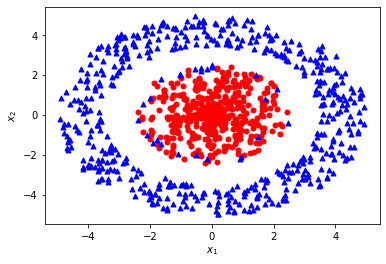

In [125]:
df1 = df[df[2] == 1]
df2 = df[df[2] == 0]

ax = df1.plot.scatter(0 ,1 , s=25, c="red")
df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [126]:
X = np.array(df[[0,1]]).T
Y = np.array(df[[2]]).T

In [127]:
np.random.seed(65468)

In [128]:
gama = 12

sonuc_parameters=[]
sonuc_cost=[]
for i in range(2,21):
  number_of_neuron = i
  parameters = initialization_parameters(X, Y, number_of_neuron, int(1), int(1))
  print(parameters)
  cost, parameters, cost_history = nn_model(X, Y, parameters, baski_neuron=number_of_neuron, number_of_iter=1000)
  sonuc_cost.append(cost)
  sonuc_parameters.append(parameters)

{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641, -0.52817175]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0

In [129]:
sonuc_cost

[0.3956588474799233,
 0.11936622933223781,
 0.10490451927623694,
 0.06880543631343297,
 0.12449722254218254,
 0.07463045671936486,
 0.0730460461617593,
 0.05892594762517718,
 0.05780636267534979,
 0.08065579544337335,
 0.08437229420133466,
 0.061396431630370965,
 0.058928951730655925,
 0.062124470650668555,
 0.06332790419208226,
 0.05952059693450279,
 0.05923574835084831,
 0.05822703811463926,
 0.0723633447841128]

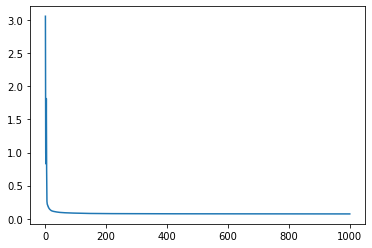

In [130]:
x = np.arange(1,1001)
plt.plot(x, cost_history)

In [131]:
parameters

{'W1': array([[ 1.64575074e+00, -3.04063644e-01],
        [-9.66839962e-01, -9.37945178e-01],
        [ 4.60602999e-01, -2.42128479e+00],
        [ 1.95511943e+00, -1.82123153e-01],
        [ 1.33449134e-01, -2.07579802e-01],
        [ 1.71036386e+00, -1.49742394e+00],
        [ 9.84721321e-02, -4.55133254e-01],
        [ 1.17902404e+00, -9.22383290e-01],
        [-2.39760438e-01, -8.57923778e-01],
        [-8.68139400e-02,  9.69966784e-01],
        [-7.94833610e-01,  8.24803246e-01],
        [ 9.03579817e-01,  1.55982808e+00],
        [ 8.44377437e-01, -6.58765188e-01],
        [-1.12490926e-01, -1.05407218e+00],
        [-2.73087654e-02,  4.11048814e-02],
        [-1.18575552e+00, -2.38922801e-01],
        [-8.05798985e-01, -8.19879529e-01],
        [-1.33589775e+00,  6.21248123e-01],
        [-1.23781308e+00,  2.59239630e-01],
        [ 1.14291786e-03,  4.97013993e-04]]),
 'W2': array([[ 1.95306890e+00, -9.79154614e-01, -8.50373925e-01,
         -1.47701674e+00,  1.28355009e+00, -1.

In [132]:
cost_history[-1]

0.0723633447841128

In [133]:
cost

0.0723633447841128

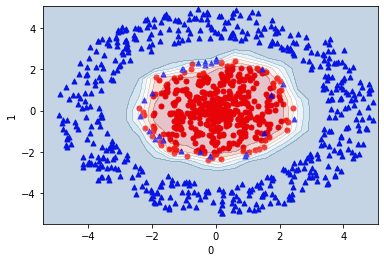

In [134]:
def plot_decision_boundary(X, Y, cmap='RdBu_r'):

  h = 0.5
  x_min, x_max = X[0,:].min() - h, X[0,:].max() + h
  y_min, y_max = X[1,:].min() - h, X[1,:].max() + h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  A2, cache = forward_prop(np.c_[xx.ravel(), yy.ravel()].T, parameters)
  A2 = A2.reshape(xx.shape)
  
  ax = df1.plot.scatter(0 ,1 , s=25, c="red", cmap=cmap)
  df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^", cmap=cmap)
  
  ax.contourf(xx, yy, A2, cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, A2, colors='k', linewidths=0.1)

plot_decision_boundary(X, Y)